In [112]:
import pandas as pd

In [113]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [114]:
import matplotlib.pyplot as plt

def bar_plot_by_category(df, category, threshold=0):

    # 1. Filtrer les pays ayant plus de 10 000 occurrences
    country_counts = df[category].value_counts()
    countries_with_high_count = country_counts[country_counts > threshold].index

    # 2. Filtrer le DataFrame d'origine pour ne conserver que les lignes correspondant à ces pays
    filtered_df = df[df[category].isin(countries_with_high_count)]

    # 3. Grouper les données par 'country' et 'isSold', puis calculer la taille de chaque groupe
    grouped = filtered_df.groupby([category, 'isSold']).size()

    # 4. Réorganiser les données pour créer un tableau croisé dynamique
    unstacked = grouped.unstack()

    # 5. Tracer les données sous forme de barres empilées
    unstacked.plot(kind='bar', stacked=True)
    plt.show()

In [115]:
df["isSold"] = df["isSold"].replace({True: 1, False: 0})

In [116]:
df['country'].replace({'UK': 'GB'}, inplace=True)

continents_df = pd.read_csv('continents2.csv')
continents_df = continents_df[['alpha-2', 'region']]

merged_df = df.merge(continents_df, left_on='country', right_on='alpha-2', how='left')
merged_df = merged_df.drop(columns=['alpha-2'])

df_test = df_test.merge(continents_df, left_on='country', right_on='alpha-2', how='left')


In [117]:
def group_env_type(env_type):
    if env_type == "js-web":
        return 1
    else:
        return 0

merged_df['environmentType'] = merged_df['environmentType'].apply(group_env_type)

In [118]:
def group_device_type(device_type):
    if device_type in ['Tablet', 'IPTV']:
        return "other"
    else:
        return device_type

merged_df['device'] = merged_df['device'].apply(group_device_type)

In [119]:
merged_df['browserVersion'] = pd.to_numeric(merged_df['browserVersion'].str.replace("_", "."), errors='coerce')

In [120]:
def group_operating_system(os):
    if os in ['Android', 'Windows', 'iOS', 'macOS']:
        return os
    else:
        return 'other'

merged_df['opeartingSystem'] = merged_df['opeartingSystem'].apply(group_operating_system)

In [121]:
import random

for browser in merged_df['browser'].unique():
    most_common_version = merged_df[merged_df['browser'] == browser]['browserVersion'].mode()
    if not most_common_version.empty:
        most_common_version = most_common_version.iloc[0]
        merged_df.loc[(df['browser'] == browser) & (merged_df['browserVersion'].isna()), 'browserVersion'] = most_common_version
    else:
        # If no mode is found, replace NaN values with a random number different from the existing ones in the column*
        existing_versions = merged_df['browserVersion'].dropna().unique()
        # print(len(existing_versions))
        random_version = random.choice([x for x in range(1, 300) if x not in existing_versions])
        merged_df.loc[(merged_df['browser'] == browser) & (merged_df['browserVersion'].isna()), 'browserVersion'] = random_version
        # print(merged_df.browserVersion.isna().sum())

In [122]:
mask = merged_df['browser'].value_counts() > 40000

merged_df['browser'] = merged_df['browser'].apply(lambda x: x if mask[x] else 'Other')
merged_df['browser'].value_counts()

browser
Chrome Mobile     235909
Chrome            165870
Facebook App      161592
Safari mobile     155999
Other             153700
Safari             49315
Microsoft Edge     44947
Name: count, dtype: int64

In [123]:
merged_df['hour'] = pd.to_datetime(merged_df['timeStamp'], unit='s').dt.hour

In [124]:
merged_df = merged_df.drop(columns=['timeStamp','auctionId', 'hashedRefererDeepThree'])
merged_df.dropna(inplace=True)

In [125]:
def categorize_by_hour(hour):
    if 0 <= hour <= 5:
        return 'night'
    elif 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    else:
        return 'evening'

merged_df['time_period'] = merged_df['hour'].apply(categorize_by_hour)

In [126]:
merged_df['pm'] = merged_df['time_period'].apply(lambda x: 1 if x in ['evening', 'afternoon'] else 0)

In [127]:
def group_region(region):
    if region == 'Americas':
        return 1
    else:
        return 0

merged_df['region'] = merged_df['region'].apply(group_region)

In [128]:
def groupe_safeness(safeness):
    if safeness == 'safe':
        return 1
    else:
        return 0

merged_df['safeness'] = merged_df['articleSafenessCategorization'].apply(groupe_safeness)

In [129]:
def group_browser(browser):
    if "Chrome" in browser:
        return "Chrome"
    elif "Safari" in browser:
        return "Safari"
    else :
        return browser

merged_df['browser'] = merged_df['browser'].apply(group_browser)

In [130]:
merged_df.browser.value_counts()

browser
Chrome            401338
Safari            198936
Facebook App      161551
Other             144168
Microsoft Edge     44920
Name: count, dtype: int64

In [131]:
merged_df

,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization,isSold,region,hour,time_period,pm,safeness
0,120706,68203,1ae7c2d3c28b711c072d8e2eb3869fa59090669bdc153e...,US,Windows,Chrome,86.0,PC,1,2,safe,0,1,16,afternoon,1,1
1,69454,42543,df1108bf6ae49dbccf5eab60ff9d04a6a09dda60ec7290...,RO,Android,Facebook App,293.0,Phone,0,1,unsafe,0,0,12,afternoon,1,0
2,100170,57703,cc6957e8aec85a4d920991c53874c5d0780bbfbd469802...,GB,Android,Facebook App,294.0,Phone,1,2,safe,1,0,11,morning,0,1
3,100446,57797,7fc0bb7a65d074e003cce786cda2b070f80dd47179c4b9...,ES,Android,Chrome,86.0,Phone,0,1,safe,1,0,15,afternoon,1,1
4,119517,67613,3a6552ccbf66ad166aa9005c3e08f70716abd676cfd87b...,FR,Android,Facebook App,293.0,Phone,0,1,unsafe,0,0,20,evening,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967327,102675,58734,374c0575d1fdf683fcf4989ed36cf25b30a3a9981f918c...,BR,iOS,Other,299.0,Phone,1,2,uncat,1,1,3,night,0,0
967328,128117,40617,4c161d1b178073c213b16cfec654847b08a181e3d03e04...,US,Windows,Chrome,86.0,PC,0,1,uncat,1,1,1,night,0,0
967329,128117,40617,4c161d1b178073c213b16cfec654847b08a181e3d03e04...,US,macOS,Chrome,85.0,PC,0,1,uncat,1,1,23,evening,1,0
967330,85195,44475,b0cae90813ff96a025b08f2c38167e94e8ae5740746356...,BR,Android,Chrome,86.0,Phone,0,1,safe,1,1,14,afternoon,1,1


In [132]:
subset_df = merged_df[['browserVersion',
                       'hour', 
                       'isSold', 
                     #   'browser',
                    #    'environmentType', 
                       'integrationType', 
                       'websiteId', 
                       'device', 
                    #    'pm',
                        'region',
                        'safeness',
                       ]]
# subset_df = pd.get_dummies(subset_df, columns=['device'])
subset_df  

,browserVersion,hour,isSold,integrationType,websiteId,device,region,safeness
0,86.0,16,0,2,68203,PC,1,1
1,293.0,12,0,1,42543,Phone,0,0
2,294.0,11,1,2,57703,Phone,0,1
3,86.0,15,1,1,57797,Phone,0,1
4,293.0,20,0,1,67613,Phone,0,0
...,...,...,...,...,...,...,...,...
967327,299.0,3,1,2,58734,Phone,1,0
967328,86.0,1,1,1,40617,PC,1,0
967329,85.0,23,1,1,40617,PC,1,0
967330,86.0,14,1,1,44475,Phone,1,1


In [109]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

X = subset_df.drop(columns=['isSold'])
y = subset_df['isSold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = subset_df.select_dtypes(include=['object', 'string']).columns
numerical_features = subset_df.select_dtypes(include=['int64', 'float64', 'int32']).columns
numerical_features = numerical_features.drop('isSold')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline pour le modèle de forêt aléatoire
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=20, 
        min_samples_split=20,
        random_state=42, 
        n_jobs=- 1))
])

# model = RandomForestClassifier(
#                                n_estimators=100,
#                                random_state=42, 
#                                n_jobs=-1, 
#                                )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy_score(y_test, y_pred)

0.7171409511891157

0.7169496170732086

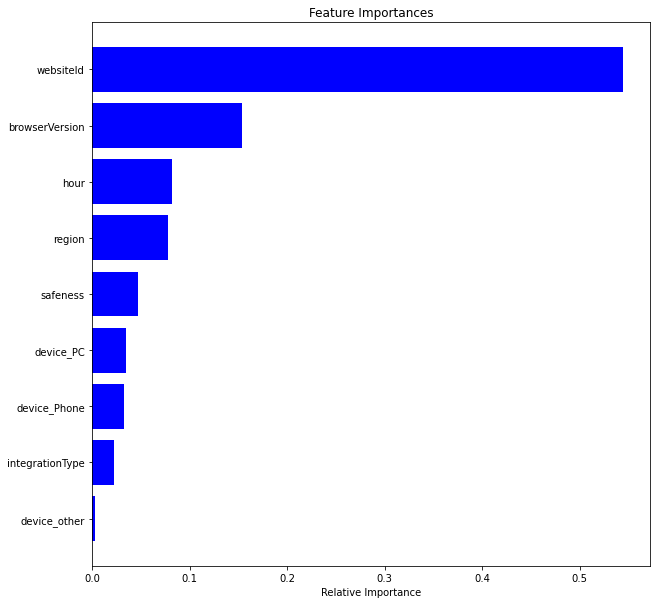

In [111]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.named_steps['classifier'].feature_importances_

feature_names = (numerical_features.tolist() + 
                 list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()))

indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [143]:
# Test the model on the test dataset
test_df = pd.read_csv('cleaned_test.csv')

test_df_pred = test_df.drop('auctionId', axis=1)

test_df_pred = test_df_pred[['browserVersion',
                       'hour', 
                       'isSold', 
                     #   'browser',
                    #    'environmentType', 
                       'integrationType', 
                       'websiteId', 
                       'device', 
                    #    'pm',
                        'region',
                        'safeness',
                       ]]
# Make predictions
y_pred = model.predict(test_df_pred)

# Save the predictions to a CSV file
submission_df = pd.DataFrame({'auctionId': test_df['auctionId'], 'isSold': y_pred})
submission_df.to_csv('submission.csv', index=False)


KeyError: "['isSold', 'safeness'] not in index"